In [171]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
X = pd.read_csv('dollar_tenge.csv', encoding = 'UTF-8', delimiter = ';')
X = X.drop(['USD_quant'], axis = 1)
X_1_year = X[:366]

Берем данные за год

In [173]:
X_1_year

,Date,USD
0,2019-01-01,384.20
1,2019-01-02,384.20
2,2019-01-03,384.20
3,2019-01-04,381.38
4,2019-01-05,378.12
...,...,...
361,2019-12-28,380.44
362,2019-12-29,380.44
363,2019-12-30,380.44
364,2019-12-31,381.18


In [175]:
Date = X_1_year['Date'].values
series = X_1_year['USD'].values
N = len(series)
tau = (N + 1) // 8
r = 15
n = N - tau
print(N, n, tau)

366 321 45


### Преобразование одномерного ряда в многомерный

In [176]:
full_X = [series[i: N - tau + i] for i in range(tau)]
full_X = np.array(full_X)
full_X.shape

(45, 321)

### Построим ковариационную матрицу

In [177]:
covMatrix = full_X @ full_X.T / n
L, V = np.linalg.eig(covMatrix)

### Переход к главным компонентам

In [178]:
Y = V.transpose().dot(full_X)

### Сглаживание.
Строим восстановленную матрицу Х_tilda используя первые r = 15 собственных векторов V

In [179]:
X_tilda = V[:r,].transpose().dot(Y[:r,])

Получим ВР из этой матрицы 

In [180]:
def x_s(s):
    Sum = 0
    if (1 <= s and s <= tau):
        for i in range(s):
            Sum += X_tilda[i][s - i]
        return Sum / s
    if (tau <= s and s <= n):
        for i in range(1, tau + 1):
            Sum += X_tilda[i - 1][s - i]
        return Sum / tau
    if (n <= s and s <= N):
        for i in range(N - s + 1):
            Sum += X_tilda[i + s - n - 1][n - i - 1]
        return Sum / (N - s + 1)

        

In [181]:
smooth_X = [x_s(i) for i in range(1, N + 1)]

## Prediction SSA

In [183]:
V_tau = V[-1, :r]
V_star = V[:tau - 1, :r]
Q = full_X[-tau + 1 : ]

In [184]:
V_tau_mult_V_star_T = V_tau @ V_star.T

In [185]:
V_tau_V_tau_T = 1 - V_tau @ V_tau.T

In [186]:
pred_X = (V_tau_mult_V_star_T @ Q) / V_tau_V_tau_T

In [201]:
def plot_graph(x, color = 'g'):
    plt.plot(x,  color = color)
    plt.xlabel('Days')
    plt.ylabel('Tenge')
    plt.show()

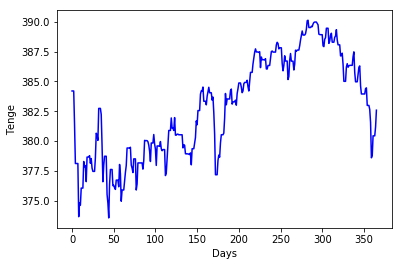

In [202]:
plot_graph(series, 'b')

Предсказание

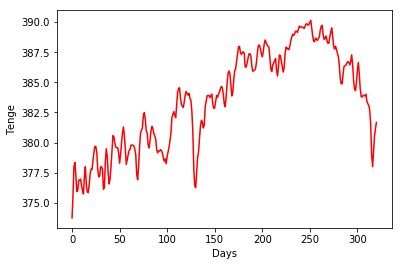

In [203]:
plot_graph(pred_X, 'r')